In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

image = Image.open("dog.jpg").convert("L")   
image = np.array(image).astype(np.float32)
image

array([[ 89.,  88.,  88., ...,  61.,  61.,  60.],
       [ 89.,  89.,  88., ...,  61.,  61.,  60.],
       [ 90.,  89.,  89., ...,  61.,  61.,  61.],
       ...,
       [144., 144., 145., ..., 103., 103., 102.],
       [144., 144., 147., ..., 103., 103., 102.],
       [144., 145., 149., ..., 103., 103., 102.]], dtype=float32)

In [2]:
kernel = np.array([[1,0,-1],
                   [2,0,-2],
                   [1,0,-1]])

In [3]:
def convolution(image, kernel):
    image_h, image_w = image.shape
    kernel_h, kernel_w = kernel.shape
    
    kernel = np.flipud(np.fliplr(kernel))
    
    pad_h = kernel_h 
    pad_w = kernel_w
    
    padded = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant')
    
    output = np.zeros_like(image)

    for i in range(image_h):
        for j in range(image_w):
            region = padded[i:i+kernel_h, j:j+kernel_w]
            output[i, j] = np.sum(region * kernel)
    
    return output

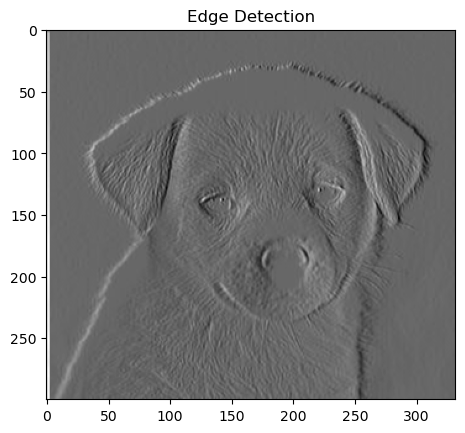

In [4]:
edge_image = convolution(image, kernel)

plt.imshow(edge_image, cmap='gray')
plt.title("Edge Detection")
plt.show()